# Viewing the data

Import the data and graphically view it to find any relationships

In [1]:
import pandas as pd

c:\users\ve032674\appdata\local\continuum\anaconda3\envs\tensorflow1\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
c:\users\ve032674\appdata\local\continuum\anaconda3\envs\tensorflow1\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [17]:
data = pd.read_csv('bank_note_data.csv')
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


We see that there are 4 measurables, and the class,  is binary

In [18]:
# Exploratory Data Analysis

import seaborn as sns
%matplotlib inline

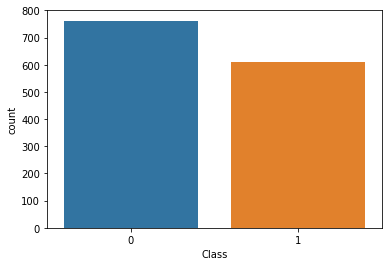

In [19]:
sns.countplot(x='Class',data=data)

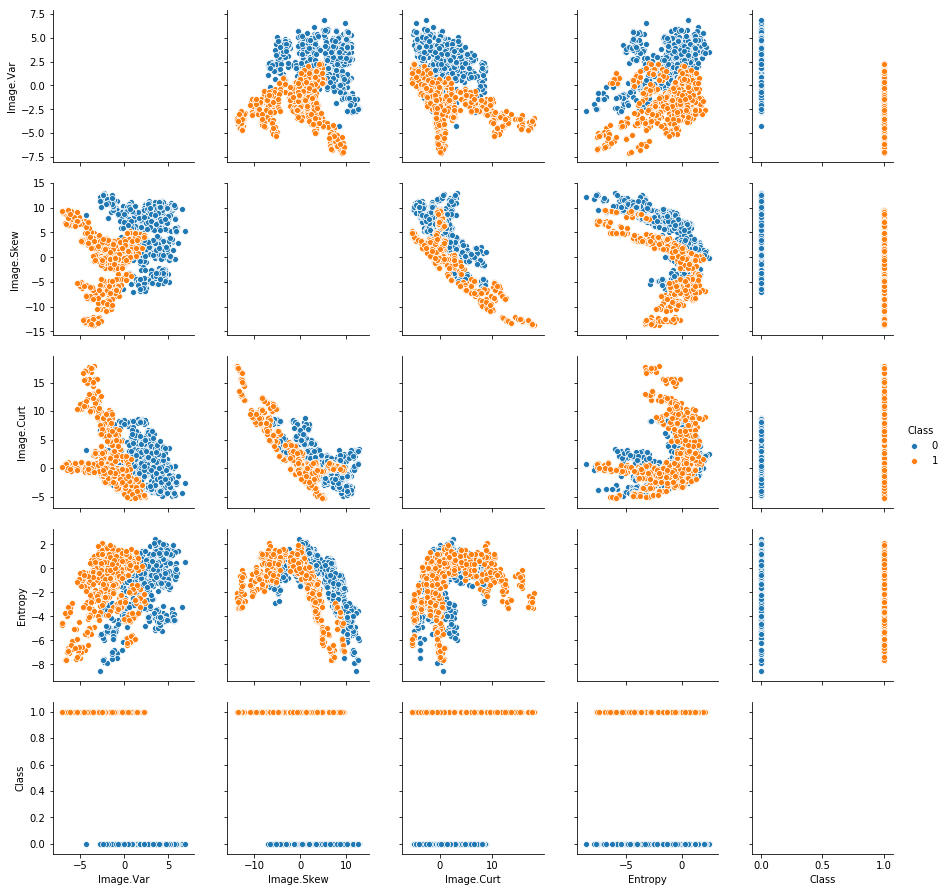

In [32]:
sns.pairplot(data,hue='Class',diag_kind="scatter")

#If LinAlgError: singular matrix, temporarily use diag_kind="scatter". update the
# seaborn file throug conda install seaborn

From the seaborn plairplot, we can see the straight lines because the classes were plotted. From the scatter plots, some of the categories seem separatable, so we would expect a successfull model

# Data Preparation

When using Neural Nework and Deep Learning based systems, it is a good idea to Standardize the data.

In [24]:
# Standard Scaling

from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaler.fit(data.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [26]:
scaled_features = scaler.fit_transform(data.drop('Class',axis=1))

In [33]:
scaled_features

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [39]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


# Train Test Split and Tensor Flow

In [41]:
X = df_feat
y= data['Class']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [43]:
import tensorflow as tf

In [46]:
feat_cols = []

for col in df_feat.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [47]:
feat_cols

[_NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [54]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=5,shuffle=True)
classifier = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10], n_classes=2,feature_columns=feat_cols)
classifier.train(input_fn=input_func,steps=50)





INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_global_id_in_cluster': 0, '_save_checkpoints_steps': None, '_master': '', '_num_worker_replicas': 1, '_log_step_count_steps': 100, '_model_dir': 'C:\\Users\\ve032674\\AppData\\Local\\Temp\\tmpt24romui', '_task_id': 0, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': None, '_service': None, '_is_chief': True, '_device_fn': None, '_num_ps_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000022FA13C8>, '_session_config': None, '_task_type': 'worker', '_evaluation_master': '', '_save_checkpoints_secs': 600, '_train_distribute': None}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 

# Model Evaluation

In [53]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)
predictions = list(classifier.predict(input_fn=pred_fn))
final_preds = []

for pred in predictions:
    final_preds.append(pred['class_ids'][0])
    
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,final_preds))
print(classification_report(y_test,final_preds))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ve032674\AppData\Local\Temp\tmp0gq4rnsu\model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[[226   9]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       235
           1       0.95      1.00      0.98       177

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



# Random Forest Classifier
This model is very good. We are going to compare it to another.

## Refresher on RFC

This supervised learning algorithm is good for regression and classification tasks
The more trees in the forest, the more robust and accurate the model

### Advantage
1. Both classification and regression tasks
2. Handle the missing values and maintains accuracy for missing data
3. Wont overfit the model
4. handle large data set with higher dimensionality

### Disadvantage
1. Good job at classification but not as good as regression
2. Very little control on what the model does

### Application
* for finding loyal/ fraud clients
* finding diseases from medical records
* Identifying loses and gains from the stock market
* recommendation engine
* image classification in computer vision

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(n_estimators=200)

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
rfc_preds = rfc.predict(X_test)

In [61]:
print(confusion_matrix(y_test,rfc_preds))
print(classification_report(y_test,rfc_preds))

[[233   2]
 [  1 176]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       235
           1       0.99      0.99      0.99       177

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

